# INF8225 TP1 H21

## *Mise à jour du notebook 03 février 2021:*
- Partie 2: le code de la fonction train
- Partie 3: b) question similaire à celle du PDF + nouveau squelette de code

**Comment utiliser**:

Il faut copier ce notebook dans vos dossiers pour avoir une version que vous pouvez modifier, voici deux façons de le faire:
* File / Save a copy in Drive ...
* File / Download .ipynb

**Pour utiliser un GPU**

Runtime / Change Runtime Type / Hardware Accelerator / GPU

## Partie 1 (10 points)



### Objectif
L’objectif de la partie I du travail pratique est de permettre à l’étudiant de se familiariser avec les réseaux Bayésiens et la librairie Numpy.

### Probleme


![picture](https://drive.google.com/uc?id=1UhYF6_QGTHGpR5VBg-RKvr8jJWJPN12A)


Voici les tables de probabilités conditionnelles fournies:

* La probabilité qu'il est Nuageux: $Pr(N=1)=0.2$
* La probabilité que l'arroseur a été utilisé sachant qu'il est nuageux ou non: $Pr(A=1|N=1)=0.1$, $Pr(A=1|N=0)=0.3$ 
* La probabilité qu'il ait plu, étant donné que le temps est nuageux: $Pr(P=1|N=1)=0.4$, $Pr(P=1|N=0)=0.1$
* La probabilité que le gazon de Watson soit mouillé...
  * ... sachant qu'il a plu est $Pr(W=1|P=1)=1$
  *... sachant qu'il n'a $\textbf{pas}$ plu: $Pr(W=1|P=0)=0.2$
* La probabilité que Holmes remarque que son gazon est mouillé...
  * ... sachant que l’arroseur a fonctionné et qu'il n'a $\textbf{pas}$ plu: $Pr(H=1|P=0, A=1)=0.9$
  * ... sachant que l’arroseur n'a $\textbf{pas}$ fonctionné et qu'il n'a $\textbf{pas}$ plu: $Pr(H=1|P=0, A=0) = 0$
  * ... sachant qu'il a plu, et que l'arroseur ait ou pas fonctionné: $Pr(H=1|P=1, A={0,1})=1$


  *For a recap on conditional probabilities : https://www.probabilitycourse.com/chapter1/1_4_0_conditional_probability.php *

#### Trucs et astuces
Nous utiliserons des vecteurs multidimensionnels `5d-arrays` dont les `axes` représenteraient ...
```
axe 0 : temps nuageux
axe 1 : pluie 
axe 2 : arroseur
axe 3 : gazon de watson
axe 4 : gazon de holmes
```
... and chaque `axe` serait de dimension `2` ...
```
0 : faux
1 : vrai
```

#### Tables de probabilites

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# les arrays sont batis avec les dimensions suivantes:
# nuageux, pluie, arroseur, watson, holmes
# et chaque dimension: faux, vrai

prob_nuageux = np.array([0.8, 0.2]).reshape(2, 1, 1, 1, 1)
prob_pluie_sachant_nuageux = np.array([0.9, 0.1, 0.6, 0.4]).reshape(2,2,1,1,1)
prob_arroseur_sachant_nuageux = np.array([0.7, 0.3, 0.9, 0.1]).reshape(2,1,2,1,1)
prob_watson_sachant_pluie = np.array([0.8, 0.2, 0, 1]).reshape(1,2,1,2,1)
prob_holmes_sachant_pluie_et_arroseur = np.array([1, 0, 0.1, 0.9, 0, 1, 0, 1]).reshape(1,2,2,1,2)

# Axes
N, P, A, W, H = 0, 1, 2, 3, 4

# Probabilité jointe totale
prob_tot = prob_nuageux * prob_pluie_sachant_nuageux * prob_arroseur_sachant_nuageux * prob_watson_sachant_pluie * prob_holmes_sachant_pluie_et_arroseur

print (f"Pr(Nuageux)=\n{np.squeeze(prob_nuageux)}\n")
print (f"Pr(Pluie|Nuageux)=\n{np.squeeze(prob_pluie_sachant_nuageux)}\n")
print (f"Pr(Arroseur|Nuageux)=\n{np.squeeze(prob_arroseur_sachant_nuageux)}\n")
print (f"Pr(Watson|Pluie)=\n{np.squeeze(prob_watson_sachant_pluie)}\n")
print (f"Pr(Holmes|Pluie,Arroseur)=\n{np.squeeze(prob_holmes_sachant_pluie_et_arroseur)}\n")

Pr(Nuageux)=
[0.8 0.2]

Pr(Pluie|Nuageux)=
[[0.9 0.1]
 [0.6 0.4]]

Pr(Arroseur|Nuageux)=
[[0.7 0.3]
 [0.9 0.1]]

Pr(Watson|Pluie)=
[[0.8 0.2]
 [0.  1. ]]

Pr(Holmes|Pluie,Arroseur)=
[[[1.  0. ]
  [0.1 0.9]]

 [[0.  1. ]
  [0.  1. ]]]



#### Questions

a) $Pr(H=1)$



In [ ]:
prob = np.sum(prob_tot, axis=(N,P,A,W)).squeeze()[1]
print("Pr(H=1) = {:.3f}".format(prob))

Pr(H=1) = 0.365


b) $Pr(H=1|N=1)$

In [ ]:
prob_num = np.sum(prob_tot, axis=(P,A,W)).squeeze()[1,1]
prob_denom = prob_nuageux.squeeze()[1]
prob = prob_num/prob_denom
print("Pr(H=1|N=1) = {:.3f}".format(prob))

Pr(H=1|N=1) = 0.454


c) $Pr(H=1|W=1)$


In [ ]:
prob_num = np.sum(prob_tot, axis=(N,P,A)).squeeze()[1,1]
prob_denom = np.sum(prob_tot, axis=(N,P,A,H)).squeeze()[1]
prob = prob_num/prob_denom
print("Pr(H=1|W=1) = {:.3f}".format(prob))

Pr(H=1|W=1) = 0.613


d) $Pr(H=1|W=0)$


In [ ]:
prob_num = np.sum(prob_tot, axis=(N,P,A)).squeeze()[0,1]    # 0.244
prob_denom = np.sum(prob_tot, axis=(N,P,A,H))[0]
prob = prob_num/prob_denom
print("Pr(H=1|W=0) = {:.3f}".format(prob))

Pr(H=1|W=0) = 0.244


e) $Pr(H=1|P=0,W=1)$


In [ ]:
prob_num = np.sum(prob_tot, axis=(N,A)).squeeze()[0,1,1]
prob_denom = np.sum(prob_tot, axis=(N,A,H)).squeeze()[0,1]
prob = prob_num/prob_denom
print("Pr(H=1|P=0,W=1) = {:.3f}".format(prob))

Pr(H=1|P=0,W=1) = 0.244


f) $Pr(W=1|H=1)$

In [ ]:
prob_num = np.sum(prob_tot, axis=(N,P,A)).squeeze()[1,1]
prob_denom = np.sum(prob_tot, axis=(N,P,A,W)).squeeze()[1]
prob = prob_num/prob_denom
print("Pr(W=1|H=1) = {:.3f}".format(prob))

Pr(W=1|H=1) = 0.550


g) $Pr(W=1|H=1,N=1)$ 

In [ ]:
prob_num = np.sum(prob_tot, axis=(P,A)).squeeze()[1,1,1]
prob_denom = np.sum(prob_tot, axis=(P,A,W))[1,1]
prob = prob_num/prob_denom
print("Pr(W=1|H=1,N=1) = {:.3f}".format(prob))

Pr(W=1|H=1,N=1) = 0.905


h) $Pr(W=1|N=1)$ 

In [ ]:
prob_num = np.sum(prob_tot, axis=(P,A,H)).squeeze()[1,1]
prob_denom = prob_nuageux.squeeze()[1]
prob = prob_num/prob_denom
print("Pr(W=1|N=1) = {:.3f}".format(prob))

Pr(W=1|N=1) = 0.520


i) $Pr(W=1)$

In [ ]:
prob = np.sum(prob_tot, axis=(N,P,A,H)).squeeze()[1]
print("Pr(W=1) = {:.3f}".format(prob))

Pr(W=1) = 0.328


j) $Pr(A=1|W=1,H=1,N=1)$

In [ ]:
prob_num = np.sum(prob_tot, axis=(P)).squeeze()[1,1,1,1]
prob_denom = np.sum(prob_tot, axis=(P,A)).squeeze()[1,1,1]
prob = prob_num/prob_denom
print("Pr(A=1|W=1,H=1,N=1) = {:.3f}".format(prob))

Pr(A=1|W=1,H=1,N=1) = 0.124


## Partie 2 (20 points)

### Objectif

L’objectif de la partie II du travail pratique est de permettre à l’étudiant de se familiariser avec l’apprentissage automatique via la régression logistique. Nous allons donc résoudre un problème de classification d'images en utilisant l’approche de descente du gradient (*gradient descent*) pour optimiser la log-vraisemblance négative (*negative log-likelihood*) comme fonction de perte.

L'algorithme à implémenter est une variation de descente de gradient qui s’appelle l’algorithme de descente de gradient stochastique par mini-ensemble (*mini-batch stochastic gradient descent*).  Votre but est d’écrire un programme en Python pour optimiser les paramètres d’un modèle étant donné un ensemble de données d’apprentissage, en utilisant un ensemble de validation pour déterminer quand arrêter l'optimisation, et finalement de montrer la performance sur l’ensemble du test.

### La régression logistique et le calcul du gradient
Il est possible d’encoder l’information concernant l’étiquetage avec des vecteurs multinomiaux (*one-hot vectors*), c.-à-d. un vecteur de zéros avec un seul 1 pour indiquer quand la classe $C=k$ dans la dimension $k$. Par exemple, le vecteur $\mathbf{y}=[0, 1, 0, \cdots, 0]^T$ pour représenter la deuxième classe. Les caractéristiques (*features*) sont données par des vecteurs $\mathbf{x}_i \in \mathbb{R}^{D}$.

En définissant les paramètres de notre modèle comme : $\mathbf{W}=[\mathbf{w}_1, \cdots, \mathbf{w}_K]^T$ et $\mathbf{b}=[b_1, b_2, \cdots  b_K]^T$ et la fonction *softmax* comme fonction de sortie, on peut exprimer notre modèle sous la forme :

\begin{eqnarray}
    p(\mathbf{y}|\mathbf{x}) 
    &=& \frac{\exp(\mathbf{y}^T \mathbf{W} \mathbf{x} + \mathbf{y}^T \mathbf{b})}{\sum_{\mathbf{y}_k \in \mathcal{Y}} \exp(\mathbf{y}_k^T \mathbf{W} \mathbf{x} + \mathbf{y}_k^T \mathbf{b})} \\
    &=& \frac{1}{Z(\mathbf{x})} \exp \bigg(\mathbf{y}^T \mathbf{W} \mathbf{x} + \mathbf{y}^T \mathbf{b}\bigg)
\end{eqnarray}

L'ensemble de données consiste de $n$ paires (*label*, *input*) de la forme $(\mathbf{\tilde{y}}_i, \mathbf{\tilde{x}}_i)_{i=1}^n$, où nous utilisons l'astuce de redéfinir $\mathbf{\tilde{x}}_i = [\mathbf{\tilde{x}}_i^T 1]^T$, et en utilisant la définition de la matrice de paramètres $\boldsymbol{\theta} \in \mathbb{R}^{K\times(D+1)}$ (voir des notes de cours pour la relation entre $\boldsymbol{\theta}$ et $\mathbf{W}$), nous avons :

\begin{eqnarray}
    \frac{\partial}{\partial \boldsymbol{\theta}} \log \prod_{i=1}^N P(\mathbf{\tilde{y}}_i|\mathbf{\tilde{x}}_i; \boldsymbol{\theta}) 
    &=& \sum_{i=1}^N \frac{\partial}{\partial \boldsymbol{\theta}} \Bigg\{\log \Bigg(\frac{1}{Z(\mathbf{\tilde{x}}_i)} \exp \Big(\mathbf{\tilde{y}}_i^T \boldsymbol{\theta} \mathbf{\tilde{x}}_i \Big) \Bigg) \Bigg\} \\
    &=& \sum_{i=1}^N \left(\mathbf{\tilde{y}}_i \mathbf{\tilde{x}}^T_i- \sum_{\mathbf{y}_k \in \mathcal{Y}} P(\mathbf{y}_k|\mathbf{\tilde{x}}_i,\boldsymbol{\theta}) \mathbf{y}_k \mathbf{\tilde{x}}^T_i \right) \\
    &=& \sum_{i=1}^N \mathbf{\tilde{y}}_i \mathbf{\tilde{x}}^T_i - \sum_{i=1}^N \mathbf{\hat{p}}_i \mathbf{\tilde{x}}^T_i
\end{eqnarray}

où $\mathbf{\hat{p}}_i$ est un vecteur de probabilités produit par le modèle pour l'exemple $\mathbf{\tilde{x}}_i$ et $\mathbf{\tilde{y}}_i$ est le vrai \textit{label} pour ce même exemple.

#### Description des tâches

On vous demande de compléter l'extrait de code ci-dessous pour résoudre ce problème. Mettez à jour les paramètres de votre modèle avec la descente par *mini-batch*. Voir les notes de cours supplémentaires disponibles sur moodle pour plus de détails concernant cette méthode. Aussi, adaptez le code ci-dessous et utilisez **Fashion MNIST** (https://github.com/zalandoresearch/fashion-mnist) pour vos expériences. Explorez différentes tailles de mini-batch, quelques taux d’apprentissage et discutez de leur impact.

#### Préparez un rapport sur votre code et vos expériences

Exécutez des expériences avec trois différents ensembles: un ensemble d’apprentissages avec 90\% des exemples (choisis au hasard), un ensemble de validation avec 10\%. Utilisez uniquement l'ensemble de test pour obtenir votre meilleur résultat une fois que vous pensez avoir obtenu votre meilleure stratégie pour entraîner le modèle.

Créer un rapport avec vos expériences incluant les figures avec les courbes de log de vraisemblance negative moyenne pour l'ensemble de test et de validation après chaque epoch.  %Montrez une figure avec les log vraisemblances et un autre avec le taux d’exemples correct (la précision).

* a) Montrez les résultats pour différents taux d'apprentissage, e.g. 0.1, 0.01, 0.001, et différentes tailles de mini-batch, e.g. 1, 20, 200, 1000.
* b) Lire l'article de recherche -
Adam: a method for stochastic optimization. Kingma, D., \& Ba, J. (2015). International Conference on Learning Representation (ICLR). 
https://arxiv.org/pdf/1412.6980.pdf. Implémentez Adam et présentez des courbes d'apprentissage dans votre rapport où vous comparez l'apprentissage avec Adam et l'apprentissage avec votre meilleur taux d'apprentissage fixe. Présentez à la fois les courbes d'apprentissage sur l’ensemble d’apprentissages et les courbes d'apprentissage pour l’ensemble de validation. Comparez les performances finales. N'oubliez pas de soumettre votre code et votre rapport.

On presente quelque element de l'ensemble de données FashionMnist.

In [ ]:
# fonctions pour charger les ensembles de donnees
from torchvision.datasets import FashionMNIST
from torchvision import datasets, models, transforms
import torch
from torch.utils.data import DataLoader, random_split
from tqdm import tqdm

import matplotlib.pyplot as plt

def get_fashion_mnist_dataloaders(val_percentage=0.1, batch_size=1):
  dataset = FashionMNIST("./dataset", train=True,  download=True, transform=transforms.Compose([transforms.ToTensor()]))
  dataset_test = FashionMNIST("./dataset", train=False,  download=True, transform=transforms.Compose([transforms.ToTensor()]))
  len_train = int(len(dataset) * (1-val_percentage))
  len_val = len(dataset) - len_train
  dataset_train, dataset_val = random_split(dataset, [len_train, len_val])
  data_loader_train = DataLoader(dataset_train, batch_size=batch_size,shuffle=True,num_workers=4)
  data_loader_val = DataLoader(dataset_val, batch_size=batch_size, shuffle=True,num_workers=4)
  data_loader_test = DataLoader(dataset_test, batch_size=batch_size, shuffle=True,num_workers=4)
  return data_loader_train, data_loader_val, data_loader_test

def reshape_input(x, y):
    x = x.view(-1, 784)
    y = torch.FloatTensor(len(y), 10).zero_().scatter_(1,y.view(-1,1),1)
    x = x.numpy()
    y = y.numpy()

    # Transformation de x->x_hat pour W->theta
    nb_instances = np.shape(x)[0]
    x = x.T
    y = y.T
    x_hat = np.append(x, np.ones((1, nb_instances)), axis=0)
    return x_hat, y
    
# call this once first to download the datasets
_ = get_fashion_mnist_dataloaders()

Extracting ./dataset/FashionMNIST/raw/train-images-idx3-ubyte.gz to ./dataset/FashionMNIST/raw


Extracting ./dataset/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./dataset/FashionMNIST/raw



Extracting ./dataset/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./dataset/FashionMNIST/raw


Extracting ./dataset/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./dataset/FashionMNIST/raw
Processing...
Done!


/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:480: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:141.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


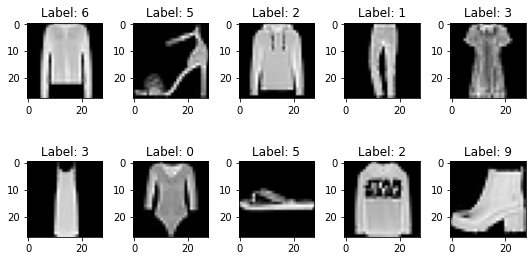

In [4]:
def plot_samples():
  a, _, _ = get_fashion_mnist_dataloaders()
  num_row = 2
  num_col = 5# plot images
  num_images = num_row * num_col
  fig, axes = plt.subplots(num_row, num_col, figsize=(1.5*num_col,2*num_row))
  for i, (x,y) in enumerate(a):
      if i >= num_images:
        break
      ax = axes[i//num_col, i%num_col]
      x = (x.numpy().squeeze() * 255).astype(int)
      y = y.numpy()[0]
      ax.imshow(x, cmap='gray')
      ax.set_title(f"Label: {y}")
      
  plt.tight_layout()
  plt.show()
plot_samples()

In [5]:
# simple logger to track progress during training
class Logger:
    def __init__(self):
        self.losses_train = []
        self.losses_valid = []
        self.accuracies_train = []
        self.accuracies_valid = []

    def log(self, accuracy_train=0, loss_train=0, accuracy_valid=0, loss_valid=0):
        self.losses_train.append(loss_train)
        self.accuracies_train.append(accuracy_train)
        self.losses_valid.append(loss_valid)
        self.accuracies_valid.append(accuracy_valid)

    def plot_loss_and_accuracy(self, train=True, valid=True):

        assert train and valid, "Cannot plot accuracy because neither train nor valid."

        figure, (ax1, ax2) = plt.subplots(nrows=1, ncols=2,
                                            figsize=(12, 6))
        
        if train:
            ax1.plot(self.losses_train, label="Training")
            ax2.plot(self.accuracies_train, label="Training")
        if valid:
            ax1.plot(self.losses_valid, label="Validation")
            ax1.set_title("CrossEntropy Loss")
            ax2.plot(self.accuracies_valid, label="Validation")
            ax2.set_title("Accuracy")
        
        for ax in figure.axes:
            ax.set_xlabel("Epoch")
            ax.legend(loc='best')
            ax.set_axisbelow(True)
            ax.minorticks_on()
            ax.grid(True, which="major", linestyle='-')
            #ax.grid(True, which="minor", linestyle='--', color='lightgrey', alpha=.4)            
  
    def print_last():
        print(f"Epoch {len(self.losses_train):2d}, \
                    Train:loss={self.losses_train[-1]:.3f}, accuracy={self.accuracies_train[-1]*100:.1f}%, \
                    Valid: loss={self.losses_valid[-1]:.3f}, accuracy={self.losses_valid[-1]*100:.1f}%", flush=True)

In [6]:
# Mathematical functions
def softmax(z):
    exposant = np.exp(z - np.max(z,axis=0, keepdims=True))
    numerateur = exposant
    denominateur = exposant.sum(axis=0, keepdims=True)
    y_pred = numerateur/denominateur
    return y_pred

def cross_entropy(y, y_pred):
    nb_instances = np.shape(y)[1]
    loss = -(y*np.log(y_pred)).sum()/nb_instances 
    return loss

def accuracy_fct(y, y_pred):
    nb_instances = y.shape[1]
    argmax_y_pred = np.argmax(y_pred, axis=0)
    argmax_y = np.argmax(y, axis=0)
    return np.sum(argmax_y_pred == argmax_y) / nb_instances

def accuracy_and_loss_whole_dataset(data_loader, model):
    loss = 0
    accuracy = 0
    nb_mbatchs = 0
    for x, y in data_loader:
      x_hat, y = reshape_input(x, y)
      y_pred = model.forward(x_hat)
      loss += cross_entropy(y, y_pred)
      accuracy += accuracy_fct(y, y_pred)
      nb_mbatchs += 1

    return accuracy/nb_mbatchs, loss/nb_mbatchs


In [7]:
import numpy as np

# Sizes and orientations of all matrices used :

# x = #features x #instances
# x_hat = (#features+1) x #instances
# y, y_pred = #classes x #instances
# weights = (#features+1) x #classes

class LinearModel:
    def __init__(self, num_features, num_classes):
        self.weights = np.random.normal(0, 0.1, (num_features, num_classes))

        # Adam parameters
        self.m_last = np.zeros(np.shape(self.weights))
        self.v_last = np.zeros(np.shape(self.weights))
        self.t = 0
        
    def forward(self, x_hat):
        z = np.dot(self.weights.T, x_hat)
        y_pred = softmax(z)
        return y_pred

    def get_grads(self, y, y_pred, x_hat):
      grad_weights = ((-np.dot(y, x_hat.T) + np.dot(y_pred, x_hat.T))*1/np.shape(y)[1]).T
      return grad_weights

    def sgd_update(self, grad_weights, lr):
      self.weights -= lr*grad_weights

    def adam_update(self, grad_weights, lr, beta1, beta2):
      epsilon = pow(10,-8)
      self.t += 1
      m = beta1*self.m_last + (1-beta1)*grad_weights
      v = beta2*self.v_last + (1-beta2)*np.power(grad_weights,2)
      m_hat = m/(1-pow(beta1,self.t))
      v_hat = v/(1-pow(beta2,self.t))
      self.weights -= lr*m_hat/(np.sqrt(v_hat)+epsilon)
      self.m_last = m
      self.v_last = v
      

def train(model=None, lr=0.1, nb_epochs=4, batch_size=1000, optimizer="sgd", print_steps=False, 
          data_loader_train=None, data_loader_val=None):

    best_model = None
    best_val_accuracy = 0
    logger = Logger()

    # The loss and accuracy is calculated for each mini-batch of the training set
    # because of a performance issue if done otherwise.

    for epoch in range(nb_epochs):
        loss_mbatch = []
        accuracy_mbatch = []
        for x, y in data_loader_train:
            x_hat, y = reshape_input(x, y)

            # Forward
            y_pred = model.forward(x_hat)

            # Backward
            grad_weights = model.get_grads(y, y_pred, x_hat)
            if optimizer == "sgd":
              model.sgd_update(grad_weights, lr)
            else:
              model.adam_update(grad_weights, lr, beta1=0.9, beta2=0.999)

            # Mini-batch performance
            accuracy_mbatch.append(accuracy_fct(y, y_pred))
            loss_mbatch.append(cross_entropy(y, y_pred))
        
        # Epoch performance
        accuracy_train = sum(accuracy_mbatch)/len(accuracy_mbatch)
        loss_train = sum(loss_mbatch)/len(loss_mbatch)
        accuracy_val, loss_val = accuracy_and_loss_whole_dataset(data_loader_val, model)

        # Record the best model parameters and best validation accuracy
        if accuracy_val > best_val_accuracy:
            best_val_accuracy = accuracy_val
            best_model = model

        # Log data and print epoch info
        logger.log(accuracy_train, loss_train, accuracy_val, loss_val)
        if (print_steps and epoch % 4 == 0):
            print(f"Epoch {epoch:2d}, \
                  #Train:loss={loss_train.item():.3f}, accuracy={accuracy_train.item()*100:.1f}%, \
                  #Val: loss={loss_val.item():.3f}, accuracy={accuracy_val.item()*100:.1f}%", flush=True)

    return best_model, best_val_accuracy, logger


def evaluateModel(lr=0.1, nb_epochs=4, batch_size=1000, optimizer="sgd", print_steps=False):
  data_loader_train, data_loader_val, data_loader_test = get_fashion_mnist_dataloaders(0.1, batch_size=batch_size)
  model = LinearModel(num_features=28*28+1, num_classes=10)

  best_model, best_val_accuracy, logger = train(model, lr, nb_epochs, batch_size, optimizer, 
                                                print_steps, data_loader_train, data_loader_test)
  logger.plot_loss_and_accuracy()
  print(f"Best validation accuracy = {best_val_accuracy*100:.3f} %")

  # Evaluate on test_set
  accuracy_test, loss_test = accuracy_and_loss_whole_dataset(data_loader_test, best_model)
  print(f"Test set loss : {loss_test:.3f}")
  print(f"Test set accuracy : {accuracy_test*100.:.3f} %\n")

Best validation accuracy = 83.810 %
Test set loss : 0.837
Test set accuracy : 81.440 %



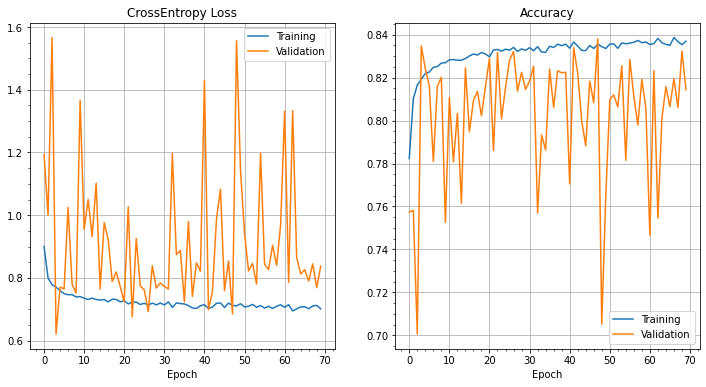

In [12]:
evaluateModel(lr=0.1, nb_epochs=70, batch_size=5, optimizer="sgd")

Best validation accuracy = 84.360 %
Test set loss : 0.532
Test set accuracy : 82.100 %



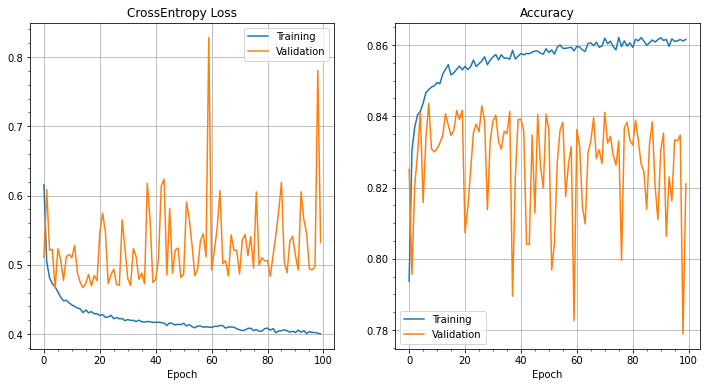

In [ ]:
evaluateModel(lr=0.1, nb_epochs=100, batch_size=20, optimizer="sgd")

Best validation accuracy = 84.580 %
Test set loss : 0.441
Test set accuracy : 84.260 %



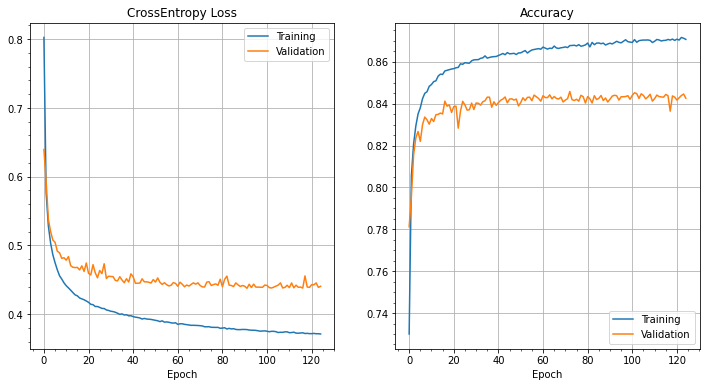

In [ ]:
evaluateModel(lr=0.1, nb_epochs=125, batch_size=200, optimizer="sgd")

Best validation accuracy = 84.480 %
Test set loss : 0.447
Test set accuracy : 84.250 %



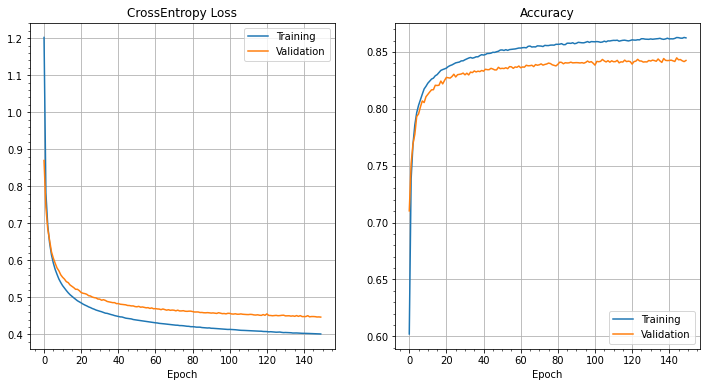

In [ ]:
evaluateModel(lr=0.1, nb_epochs=150, batch_size=1000, optimizer="sgd")

Best validation accuracy = 84.600 %
Test set loss : 0.457
Test set accuracy : 83.940 %



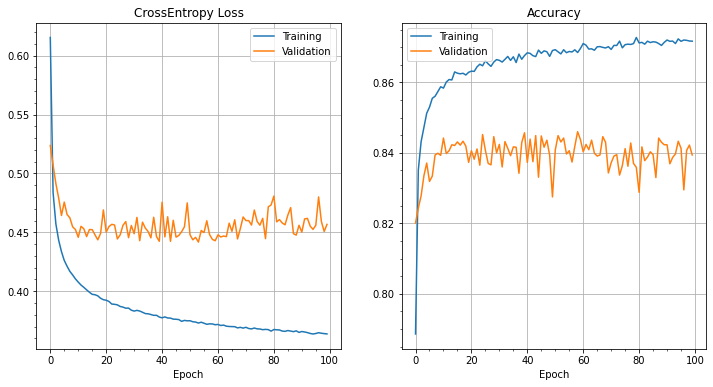

In [ ]:
evaluateModel(lr=0.01, nb_epochs=100, batch_size=5, optimizer="sgd")

Best validation accuracy = 84.780 %
Test set loss : 0.437
Test set accuracy : 84.570 %



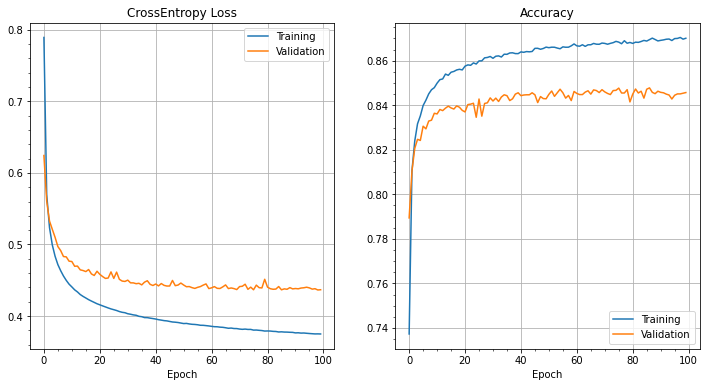

In [ ]:
evaluateModel(lr=0.01, nb_epochs=100, batch_size=20, optimizer="sgd")

Best validation accuracy = 83.650 %
Test set loss : 0.467
Test set accuracy : 83.580 %



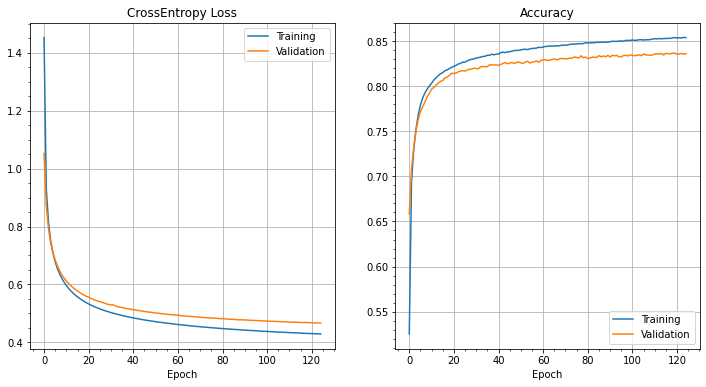

In [ ]:
evaluateModel(lr=0.01, nb_epochs=125, batch_size=200, optimizer="sgd")

Best validation accuracy = 82.030 %
Test set loss : 0.532
Test set accuracy : 81.930 %



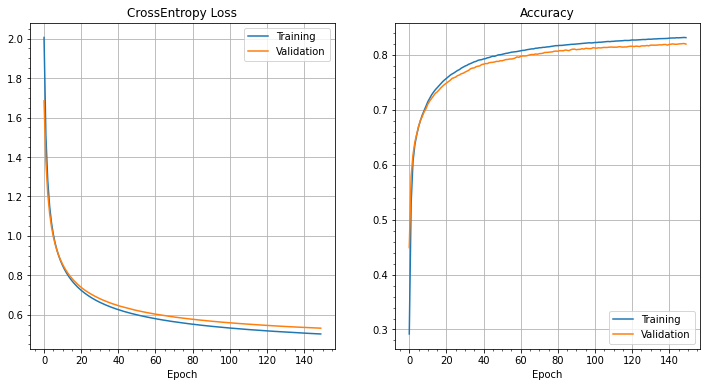

In [ ]:
evaluateModel(lr=0.01, nb_epochs=150, batch_size=1000, optimizer="sgd")

Best validation accuracy = 84.480 %
Test set loss : 0.443
Test set accuracy : 84.300 %



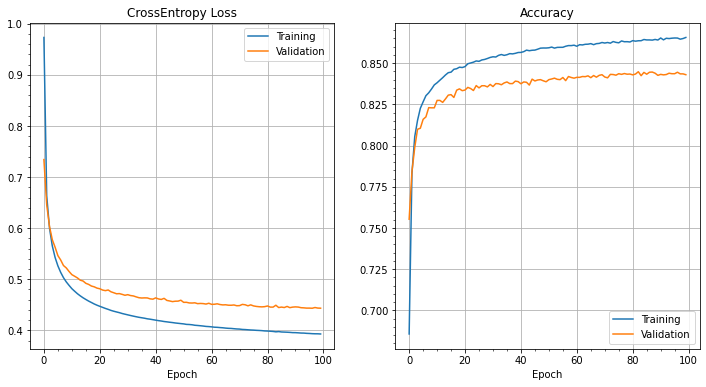

In [ ]:
evaluateModel(lr=0.001, nb_epochs=100, batch_size=5, optimizer="sgd")

Best validation accuracy = 83.580 %
Test set loss : 0.477
Test set accuracy : 83.580 %



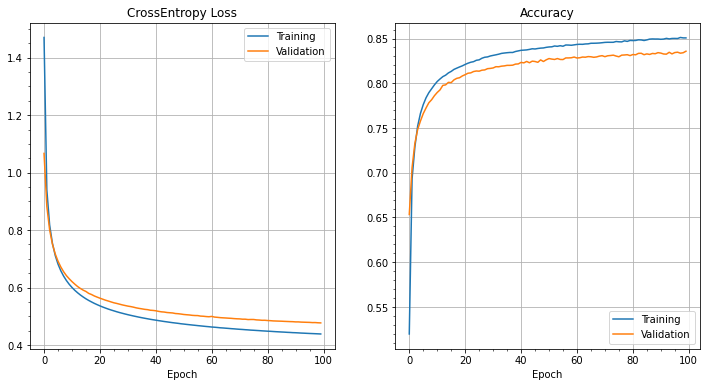

In [ ]:
evaluateModel(lr=0.001, nb_epochs=100, batch_size=20, optimizer="sgd")

Best validation accuracy = 79.550 %
Test set loss : 0.592
Test set accuracy : 79.550 %



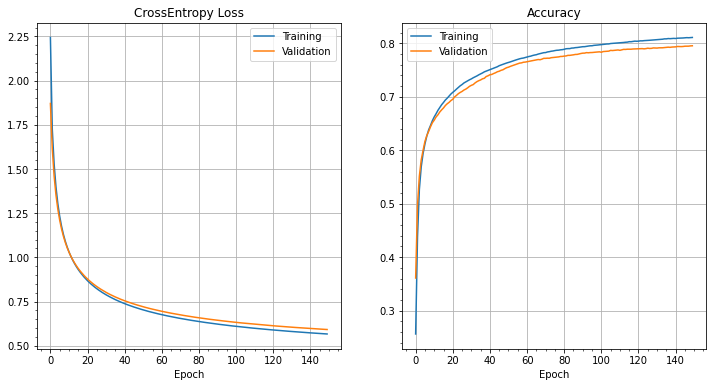

In [ ]:
evaluateModel(lr=0.001, nb_epochs=150, batch_size=200, optimizer="sgd")

Best validation accuracy = 75.520 %
Test set loss : 0.734
Test set accuracy : 75.510 %



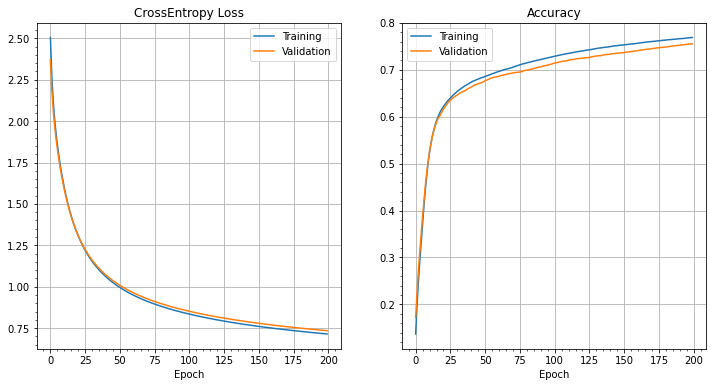

In [ ]:
evaluateModel(lr=0.001, nb_epochs=200, batch_size=1000, optimizer="sgd")

Best validation accuracy = 83.320 %
Test set loss : 0.854
Test set accuracy : 80.320 %



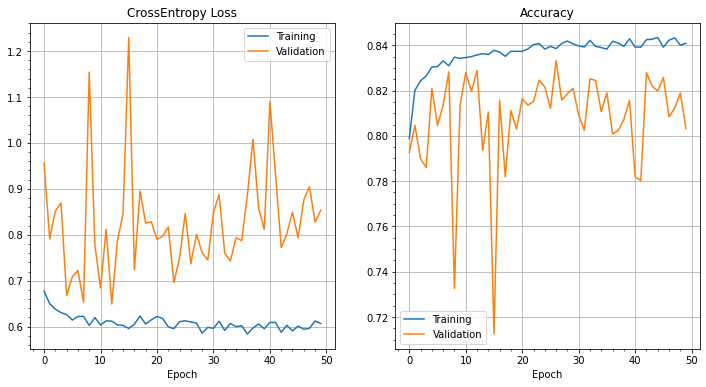

In [8]:
evaluateModel(lr=0.01, nb_epochs=50, batch_size=20, optimizer="adam")

Best validation accuracy = 83.830 %
Test set loss : 0.812
Test set accuracy : 81.440 %



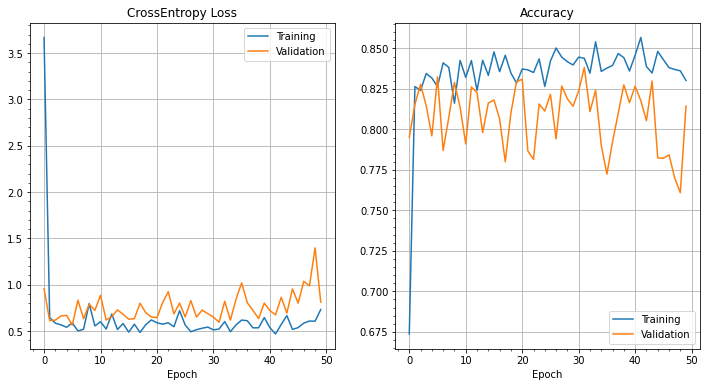

In [9]:
evaluateModel(lr=0.1, nb_epochs=50, batch_size=1000, optimizer="adam")

Best validation accuracy = 84.490 %
Test set loss : 0.500
Test set accuracy : 83.430 %



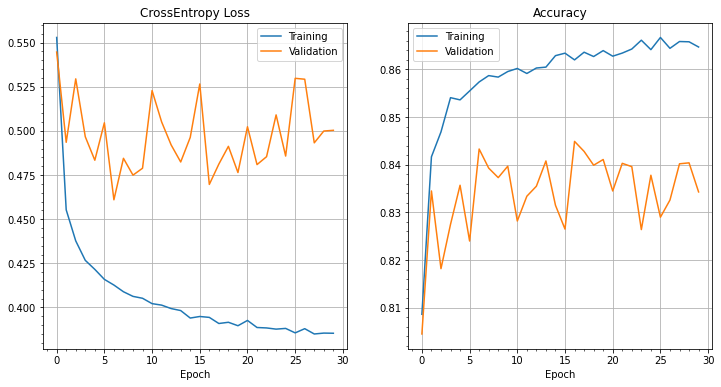

In [10]:
evaluateModel(lr=0.001, nb_epochs=30, batch_size=5, optimizer="adam")

Best validation accuracy = 83.975 %
Test set loss : 0.523
Test set accuracy : 83.627 %



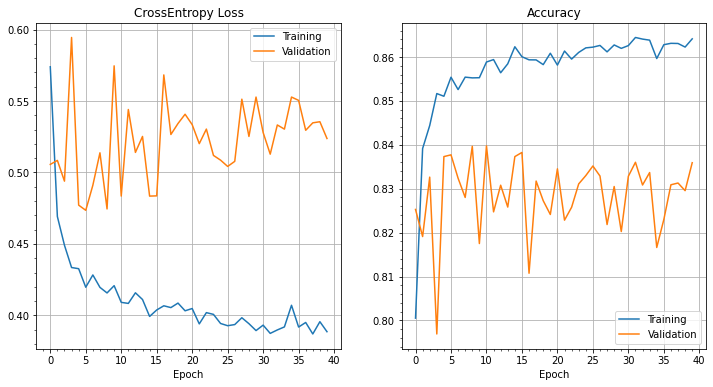

In [11]:
evaluateModel(lr=0.01, nb_epochs=40, batch_size=150, optimizer="adam")

Best validation accuracy = 84.851 %
Test set loss : 0.446
Test set accuracy : 84.284 %



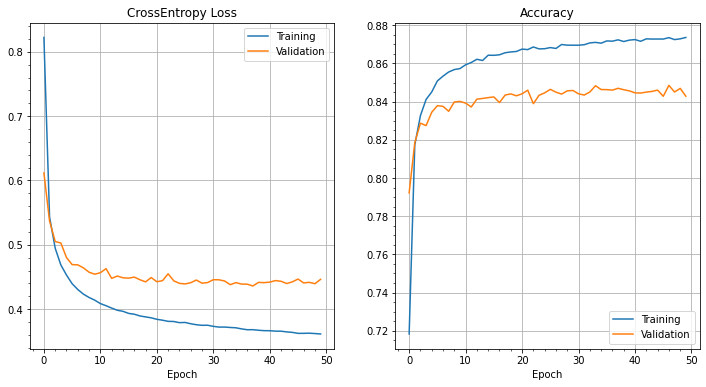

In [13]:
evaluateModel(lr=0.001, nb_epochs=50, batch_size=150, optimizer="adam")

Best validation accuracy = 84.940 %
Test set loss : 0.439
Test set accuracy : 84.600 %



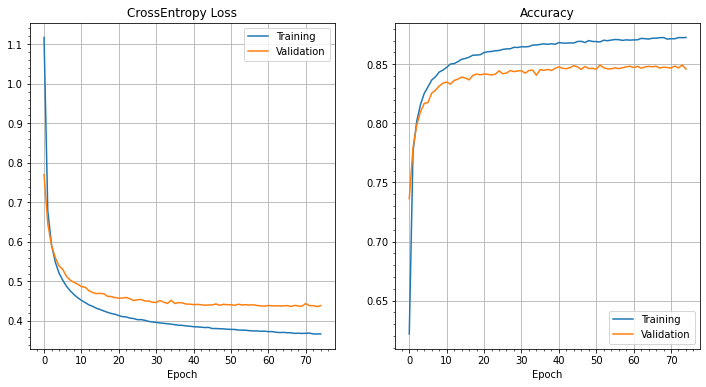

In [14]:
evaluateModel(lr=0.001, nb_epochs=75, batch_size=500, optimizer="adam")

## **Discussion :**

12 modèles on été testés avec des taux d'apprentissage et des tailles de batch différentes. Les taux d'apprentissages sont de 0.1, 0.01 et 0.001. Les tailles de batch sont de 5, 20, 200 et 1000. Le nombre d'epoch a aussi été choisi afin d'atteindre un plateau par rapport à la précision du validation set tant que le temps d'exécution demeurait raisonnable et que de bons résultats étaient attendus.

**IMPORTANT **: j'ai remarqué à la toute fin que j'ai fait une erreur dans le calcul de la précision et de la fonction de coût pour l'entraînement. Le calcul n'est fait que sur la mini-batch et non sur l'ensemble des données. Cela fait en sorte que lorsque le taux d'apprentissage est grand et la taille des mini-batchs sont petites, les courbes d'entraînement sont anormalement lisses sur les graphiques. Les courbes de training set et de validation set sont supposés avoit la même régularité. Dans tous les cas, ça ne change en rien l'analyse dans le câdre de ce TP considérant que l'on implémente pas de techniques de régularisation.

Ainsi, la presque totalité des tests avec sgd ont permis de dépasser 80.0% sur le test set. On remarque que plus le taux d'apprentissage est faible et que la taille de mini-batch est élevée, plus la courbe du validation set est lisse (celle du training set l'est aussi, mais on ne peux pas se fier aux coubres expérimentales pour la raison énoncée plus haut). À l'inverse, la courbe oscille énormément. Ces résultats étaient attendus.

Le meilleur résultat a été obtenu avec un taux d'apprentissage de 0.01, un nombre d'epochs de 100 et une taille de mini-batch de 20, soit 84.570 % sur le test set.

Du côté d'adam, les 3 meilleurs modèles sdg ont été testés avec adam. Ils ont toutefois donné des performances inférieures qu'avec sdg. Cela est surprenant, mais adam peut effectivement parfois donner une peformance inférieure à hyperparamètres équivalents. 3 autres modèles ont été testés. Un modèle avec un taux d'apprentissage de 0.001, un nombre d'epochs de 75 et une taille de mini-batch de 500 a permis de battre légèrement le meilleur modèle sgd, soit 84,600 % sur le test set.

Finalement, on remarque également que la précision sur le validation set et le test set sont très proches dans la grande majorité des cas. Cela montre que notre modèle apprend correctement et n'est pas biaisé par le validation set.

Il est évident qu'avec d'avantage de temps et de tests de modèle, il serait possible d'atteindre une précision encore plus élevée.






## Partie 3 (20 points)

Pour cette partie, vous pouvez travailler en groupes de 2, mais il faut écrire sa propre dérivation et soumettre son propre rapport. Si vous travaillez avec un partenaire, il faut indiquer leur nom dans votre rapport.

### Probleme

![picture](https://drive.google.com/uc?id=17_N7pIrf5pypQKiUh5cM7SX6raZUBcJC)

Considérons un réseau de neurones avec une couche d'entrée avec $D=784$ unités, $L$ couches cachées, chacune avec 300 unités et un vecteur de sortie $\mathbf{y}$ de dimension $K$. Vous avez $i = 1, .., N$ exemples. $\mathbf{y}$ est un vecteur du type *one-hot* -- un vecteur de zéros avec un seul 1 pour indiquer quand la classe $C=k$ dans la dimension $k$. Par exemple, le vecteur $\mathbf{y}=[0, 1, 0, \cdots, 0]^T$ pour représenter la deuxième classe, et chaque vecteur continus ${\bf x}_i \in \mathbb{R}^{784}$ dans un ensemble d'apprentissage. La fonction de perte est donnée par
\begin{equation}
L = -\sum_{i=1}^{N}\sum_{k=1}^{K}y_{k,i}\log (f_k( {\bf x}_i )  ) 
\end{equation}

La fonction d'activation de la couche finale a la forme  ${\bf f} = [f_1, ..., f_K]$ donné par la fonction d'activation \emph{softmax}: 
\begin{equation}
f_k( {\bf a}^{(L+1)}({\bf x}_i) ) = \frac{\exp(a_k^{(L+1)})}{\sum_{c=1}^{K}\exp(a_c^{(L+1)})}, \;\;\;\;
{\bf h}^{(l)}({\bf a}^{(l)}({\bf x}_i)) = \text{ReLU}({\bf a}^{(l)}({\bf x}_i)), \nonumber
\end{equation}

où ${\bf a}^{(l)}$ est le vecteur résultant du calcul de la préactivation habituelle ${\bf a}^{(l)}={\bf W}^{(l)}{\bf h}^{(l-1)} + {\bf b}^{(l)}$, qui pourrait être simplifiée à ${\boldsymbol \theta}^{(l)}\hat{\bf h}^{(l-1)}$ en utilisant l'astuce de définir $\hat{\bf h}$ comme ${\bf h}$ avec un 1 concaténé à la fin du vecteur.



### Questions

* a) (10 points) Donnez le pseudocode incluant des *calculs matriciels—vectoriels* détaillés pour l'algorithme de rétropropagation pour calculer le gradient pour les paramètres de chaque couche étant donné un exemple d'entraînement.

* b) (10 points) 
Implémentez l'optimisation basée sur le gradient de ce réseau en Python.
Utilisez le code squelette fourni par les chargés de laboratoire comme point de départ, implémentez les mathématiques de l'algorithme de rétropropagation **sans utilisation de logiciel de haut niveau (comme Pytorch) pour calculer automatiquement les gradients**. 
  
  Utilisez **Fashion MNIST** (https://github.com/zalandoresearch/fashion-mnist) encore pour vos expériences.

  Utilisez Adam pour optimiser votre modèle et comparez différents modèles ayant différentes largeurs (nombre d'unités) et profondeurs (nombre de couches). Ici encore, n'utilisez le test que pour une expérience finale lorsque vous pensez avoir obtenu votre meilleur modèle - définir un ensemble de validation à partir de l'ensemble d'apprentissage. Vous devez soumettre votre code et un rapport avec **vos expériences**. 

  Si vous souhaitez vérifier que votre réseau fonctionne comme prévu, vous pouvez créer une implémentation dans un langage de haut niveau comme point de comparaison. Des comparaisons approfondies entre les deux sont facultatives.


In [1]:
# simple logger to track progress during training
class Logger:
    def __init__(self):
        self.losses_train = []
        self.losses_valid = []
        self.accuracies_train = []
        self.accuracies_valid = []

    def log(self, accuracy_train=0, loss_train=0, accuracy_valid=0, loss_valid=0):
        self.losses_train.append(loss_train)
        self.accuracies_train.append(accuracy_train)
        self.losses_valid.append(loss_valid)
        self.accuracies_valid.append(accuracy_valid)

    def plot_loss_and_accuracy(self, train=True, valid=True):

        assert train and valid, "Cannot plot accuracy because neither train nor valid."

        figure, (ax1, ax2) = plt.subplots(nrows=1, ncols=2,
                                            figsize=(12, 6))
        
        if train:
            ax1.plot(self.losses_train, label="Training")
            ax2.plot(self.accuracies_train, label="Training")
        if valid:
            ax1.plot(self.losses_valid, label="Validation")
            ax1.set_title("CrossEntropy Loss")
            ax2.plot(self.accuracies_valid, label="Validation")
            ax2.set_title("Accuracy")
        
        for ax in figure.axes:
            ax.set_xlabel("Epoch")
            ax.legend(loc='best')
            ax.set_axisbelow(True)
            ax.minorticks_on()
            ax.grid(True, which="major", linestyle='-')
            ax.grid(True, which="minor", linestyle='--', color='lightgrey', alpha=.4)            
  
    def print_last():
        print(f"Epoch {len(self.losses_train):2d}, \
                    Train:loss={self.losses_train[-1]:.3f}, accuracy={self.accuracies_train[-1]*100:.1f}%, \
                    Valid: loss={self.losses_valid[-1]:.3f}, accuracy={self.losses_valid[-1]*100:.1f}%", flush=True)

In [2]:
# fonctions pour charger les ensembles de donnees
from torchvision.datasets import FashionMNIST
from torchvision import datasets, models, transforms
import torch
from torch.utils.data import DataLoader, random_split
from tqdm import tqdm

import matplotlib.pyplot as plt
import numpy as np

def get_fashion_mnist_dataloaders(val_percentage=0.1, batch_size=1):
  dataset = FashionMNIST("./dataset", train=True,  download=True, transform=transforms.Compose([transforms.ToTensor()]))
  dataset_test = FashionMNIST("./dataset", train=False,  download=True, transform=transforms.Compose([transforms.ToTensor()]))
  len_train = int(len(dataset) * (1-val_percentage))
  len_val = len(dataset) - len_train
  dataset_train, dataset_val = random_split(dataset, [len_train, len_val])
  data_loader_train = DataLoader(dataset_train, batch_size=batch_size,shuffle=True,num_workers=4)
  data_loader_val = DataLoader(dataset_val, batch_size=batch_size, shuffle=True,num_workers=4)
  data_loader_test = DataLoader(dataset_test, batch_size=batch_size, shuffle=True,num_workers=4)
  return data_loader_train, data_loader_val, data_loader_test

def reshape_input(x, y):
    x = x.view(-1, 784)
    y = torch.FloatTensor(len(y), 10).zero_().scatter_(1,y.view(-1,1),1)
    x = x.numpy()
    y = y.numpy()

    # Transformation de x->x_hat pour W->theta
    nb_instances = np.shape(x)[0]
    x = x.T
    y = y.T
    x_hat = np.append(x, np.ones((1, nb_instances)), axis=0)
    return x_hat, y

    
# call this once first to download the datasets
_ = get_fashion_mnist_dataloaders()

In [10]:
# Mathematical functions
def softmax(z):
    exposant = np.exp(z - np.max(z,axis=0, keepdims=True))
    numerateur = exposant
    denominateur = exposant.sum(axis=0, keepdims=True)
    y_pred = numerateur/denominateur
    return y_pred

def cross_entropy(y, y_pred):
    nb_instances = np.shape(y)[1]
    loss = -(y*np.log(y_pred)).sum()/nb_instances 
    return loss

def accuracy_fct(y, y_pred):
    nb_instances = y.shape[1]
    argmax_y_pred = np.argmax(y_pred, axis=0)
    argmax_y = np.argmax(y, axis=0)
    return np.sum(argmax_y_pred == argmax_y) / nb_instances

def accuracy_and_loss_whole_dataset(data_loader, model):
    nb_mbatchs = 0
    loss = 0
    accuracy = 0
    for x, y in data_loader:
      x_hat, y = reshape_input(x, y)
      y_pred = model.forward(x_hat)
      loss += cross_entropy(y, y_pred)
      accuracy += accuracy_fct(y, y_pred)
      nb_mbatchs += 1

    return accuracy/nb_mbatchs, loss/nb_mbatchs

def RELU(X):
    return np.maximum(X,0)

In [29]:
# **************************************************
# ANCIENNE IMPLÉMENTATION 
# **************************************************

# Sizes and orientations of all matrices used :

# x_hat = #features x #instances
# a = #neuronnes x x#instances
# h = #neuronnes x #instances
# y, y_pred = #classes x #instances
# weights = #features x #neuronnes

class MLPModel:
    def __init__(self, nb_hidden_layers, nb_hidden_features, nb_features, nb_classes):
        self.nb_hidden_layers = nb_hidden_layers
        self.nb_hidden_features = nb_hidden_features
        self.nb_features = nb_features
        self.nb_classes = nb_classes
        self.a = [np.array([0]) for i in range(nb_hidden_layers+1)]  # Fonction linéaire
        self.h = [np.array([0]) for i in range(nb_hidden_layers+1)]  # Fonction d'activation

        # Poids
        self.weights = []
        if nb_hidden_layers > 0:
            for hidden_layer in range(nb_hidden_layers+1):
                if layer == 0:
                    dims = (nb_features+1, nb_hidden_features[layer]+1)
                elif layer == (nb_hidden_layers):  # Layer softmax
                    dims = (nb_hidden_features[-1]+1, nb_classes)
                else:
                    dims = (nb_hidden_features[layer-1]+1, nb_hidden_features[layer])
                self.weights.append(np.random.normal(0, 0.1, dims))
        else:
            self.weights.append(np.random.normal(0, 0.1, (nb_features+1, nb_classes)))

        # Adam parameters
        self.t = 0
        self.m_last = [np.array([0]) for i in range(nb_hidden_layers+1)]
        self.v_last = [np.array([0]) for i in range(nb_hidden_layers+1)]
        

    def forward(self, x_hat):
        for layer in range(self.nb_hidden_layers+1):
            h_prev = self.h[layer-1] if layer is not 0 else x_hat
            a = np.dot(self.weights[layer].T, h_prev)
            if layer != (self.nb_hidden_layers):
                h = np.maximum(a,0)
            else:
                h = softmax(a)
            h_hat = np.append(h,np.ones((1,h.shape[1])),axis=0)
            self.h[layer] = h
            self.a[layer] = a
            y_pred = self.h[-1]
        
        return y_pred


        def backward(self, y, y_pred, x_hat):
        grad_weights = []
        delta_l = y-y_pred
        phi_l = self.h[layer-1]
        delta_l_plus1 = -delta_l
        for layer in reversed(range(self.nb_hidden_layers)):
            if layer == (self.nb_hidden_layers):  # softmax layer
                
            else:
                D_l = np.zeros(np.shape(self.a[layer]))
                D_l[self.a[layer] > 0] = 1
                phi_l = self.h[layer-1]
                W_l_plus1 = self.weights[layer+1]
                delta_l = D*W.T*delta_l_plus1
                delta_l_plus1 = delta_l

            grad_weights_l = delta_l*phi_l
            grad_weights.append(grad_weights_l)
            return grad_weights
      
    def sgd_update(self, grad_weights, lr):
        for layer in range(self.nb_hidden_layers+1):
            self.weights[layer] -= lr*grad_weights[layer]


    def adam_update(self, grad_weights, lr, beta1, beta2):
        epsilon = pow(10,-8)
        self.t += 1
        for layer in range(self.nb_hidden_layers+1):
            m = beta1*self.m_last[layer] + (1-beta1)*grad_weights[layer]
            v = beta2*self.v_last[layer] + (1-beta2)*(grad_weights[layer] ** 2)
            m_hat = m/(1-pow(beta1,self.t))
            v_hat = v/(1-pow(beta2,self.t))
            self.weights[layer] -= lr*m_hat/(np.sqrt(v_hat)+epsilon)
            self.m_last[layer] = m
            self.v_last[layer] = v

In [29]:
# **************************************************
# ANCIENNE IMPLÉMENTATION 
# **************************************************

def train(model=None, lr=0.1, nb_epochs=4, batch_size=100, optimizer="sgd", print_steps=False,
          data_loader_train=None, data_loader_val=None):

    best_model = None
    best_val_accuracy = 0
    logger = Logger()

    # The loss and accuracy is calculated for each mini-batch of the training set
    # because of a performance issue if done otherwise.

    for epoch in range(nb_epochs):
        loss_mbatch = []
        accuracy_mbatch = []
        for x, y in data_loader_train:
            x_hat, y = reshape_input(x, y)

            # Forward
            y_pred = model.forward(x_hat)

            # Backward
            grad_weights = model.backward(y, y_pred, x_hat)
            if optimizer == "sgd":
              model.sgd_update(grad_weights, lr)
            else:
              model.adam_update(grad_weights, lr, beta1=0.9, beta2=0.999)

            # Mini-batch performance
            accuracy_mbatch.append(accuracy_fct(y, y_pred))
            loss_mbatch.append(cross_entropy(y, y_pred))
        
        # Epoch performance
        accuracy_train = sum(accuracy_mbatch)/len(accuracy_mbatch)
        loss_train = sum(loss_mbatch)/len(loss_mbatch)
        accuracy_val, loss_val = accuracy_and_loss_whole_dataset(data_loader_val, model)

        # Record the best model parameters and best validation accuracy
        if accuracy_val > best_val_accuracy:
            best_val_accuracy = accuracy_val
            best_model = model

        # Log data and print epoch info
        logger.log(accuracy_train, loss_train, accuracy_val, loss_val)
        if (print_steps and epoch % 4 == 0):
            print(f"Epoch {epoch:2d}, \
                  #Train:loss={loss_train.item():.3f}, accuracy={accuracy_train.item()*100:.1f}%, \
                  #Val: loss={loss_val.item():.3f}, accuracy={accuracy_val.item()*100:.1f}%", flush=True)

    return best_model, best_val_accuracy, logger


def evaluateModel(nb_hidden_layers=0, nb_hidden_features=[], lr=0.1, nb_epochs=4, batch_size=100, 
                  optimizer="sgd", print_steps=False):
  data_loader_train, data_loader_val, data_loader_test = get_fashion_mnist_dataloaders(0.1, batch_size=batch_size)
  model = MLPModel(nb_hidden_layers, nb_hidden_features, nb_features=28*28, nb_classes=10)

  best_model, best_val_accuracy, logger = train(model, lr, nb_epochs, batch_size, optimizer, 
                                                print_steps, data_loader_train, data_loader_val)
  
  logger.plot_loss_and_accuracy()
  print(f"Best validation accuracy = {best_val_accuracy*100:.3f} %")

  # Evaluate on test_set
  accuracy_test, loss_test = accuracy_and_loss_whole_dataset(data_loader_test, best_model)
  print(f"Test set loss : {loss_test:.3f}")
  print(f"Test set accuracy ccuracy : {accuracy_test*100.:.3f} %\n")

In [37]:
# Sizes and orientations of all matrices used :

# x_hat = #features x #instances
# a = #neuronnes x x#instances
# h = #neuronnes x #instances
# y, y_pred = #classes x #instances
# weights = #features x #neuronnes

class RNN():
    def __init__(self, num_hidden_layers = 1, num_neurons = 300, num_classes = 10, num_features = 784):
        if num_hidden_layers < 1:
            raise ValueError("Cannot create this model with less than 1 hidden layer")
        self.num_hidden_layers = num_hidden_layers
        
        self.weights = [np.random.normal(0, 0.01, (num_neurons, num_features))]
        for layer in range(num_hidden_layers-1):
            self.weights.append(np.random.normal(0, 0.01, (num_neurons, num_neurons+1)))
        
        self.weights.append(np.random.normal(0, 0.01, (num_classes, num_neurons+1)))
        
        #Adam
        self.t = 0
        self.m_last = [np.array([0]) for i in range(num_hidden_layers+1)]
        self.v_last = [np.array([0]) for i in range(num_hidden_layers+1)]
    
    
    def forward(self, X):
        h_hat = X
        self.H = [X]
        self.D = []
        for i in range(self.num_hidden_layers):
            a = np.dot(self.weights[i], h_hat)
            h = RELU(a)
            h_hat = np.append(h,np.ones((1,h.shape[1])),axis=0)
            self.D.append((a>0)*1)
            self.H.append(h_hat)
            
        a = np.dot(self.weights[-1], h_hat)
        h = softmax(a)
        return h

    
    def get_grads(self, y, y_pred, X):
        delta = y - y_pred
        num_echant = y.shape[1]
        grad_weights = [ - np.dot(delta, self.H[-1].T)/ num_echant ]
        current = 0
        for l in range(self.num_hidden_layers,0,-1):  # L to 1
            W = np.delete(self.weights[l],-1,1)   # Delete the biais
            delta = self.D[l-1] * np.dot( W.T , delta)
            grad_weights.append( - np.dot(delta, self.H[l-1].T)/ num_echant )
        return grad_weights[::-1]
        
    
    def sgd_update(self, grad_weights, lr):
        for l in range(self.num_hidden_layers+1):
            self.weights[l] -= lr*grad_weights[l]
            
            
    def adam_update(self, grad_weights, lr, beta1, beta2):
        epsilon = pow(10,-8)
        self.t += 1
        for layer in range(self.num_hidden_layers+1):
            m = beta1*self.m_last[layer] + (1-beta1)*grad_weights[layer]
            v = beta2*self.v_last[layer] + (1-beta2)*(grad_weights[layer] ** 2)
            m_hat = m/(1-pow(beta1,self.t))
            v_hat = v/(1-pow(beta2,self.t))
            self.weights[layer] -= lr*m_hat/(np.sqrt(v_hat)+epsilon)
            self.m_last[layer] = m
            self.v_last[layer] = v        

In [31]:
def train_RNN(model=None, num_hidden_layers=1, lr=0.1, nb_epochs=10, batch_size=500, optimizer="sgd", print_steps=False, 
              data_loader_train=None, data_loader_val=None):

    best_model = None
    best_val_accuracy = 0
    logger = Logger()

    for epoch in range(nb_epochs):
        loss = 0
        accuracy = 0
        for x, y in data_loader_train:
            X, y = reshape_input(x, y)
              
            # Forward propagation
            y_pred = model.forward(X)

            # Backward propagation
            grad_weights = model.get_grads(y, y_pred, X)
            
            # Update weights
            if optimizer=="sgd":
                model.sgd_update(grad_weights,lr)
            else:
                model.adam_update(grad_weights, lr, beta1=0.9, beta2=0.999)
        
        # Epoch performance
        accuracy_train, loss_train = accuracy_and_loss_whole_dataset(data_loader_train, model)
        accuracy_val, loss_val = accuracy_and_loss_whole_dataset(data_loader_val, model)
        
        if accuracy_val > best_val_accuracy:
            best_val_accuracy = accuracy_val
            best_model = model

        logger.log(accuracy_train, loss_train, accuracy_val, loss_val)
        if (print_steps and epoch % 5 == 0):
            print(f"Epoch {epoch:2d}, \
                  Train:loss={loss_train.item():.3f}, accuracy={accuracy_train.item()*100:.1f}%, \
                  Val: loss={loss_val.item():.3f}, accuracy={accuracy_val.item()*100:.1f}%", flush=True)

    return best_model, best_val_accuracy, logger 


def evaluateModel(num_hidden_layers=1, num_neurons=300, lr=0.1, num_epochs=4, batch_size=100, 
                  optimizer="sgd", print_steps=False):
  
    # Load data
    data_loader_train, data_loader_val, data_loader_test = get_fashion_mnist_dataloaders(0.1, batch_size=batch_size)

    # Create model
    model = RNN(num_hidden_layers = 1, num_neurons = 300, num_classes = 10, num_features = 785)

    # Training
    best_model, best_val_accuracy, logger = train_RNN(model, num_hidden_layers, lr, num_epochs, batch_size, optimizer, 
                                                  print_steps, data_loader_train, data_loader_val)
    
    print("Hidden layers: ", num_hidden_layers)
    print("Learning rate: ", lr)
    print("Epochs: ", num_epochs)
    print("Batch size: ", batch_size)
    if optimizer=="sgd":
        print("Optimizer : SGD")
    else:
        print("Optimizer : Adam")
    print()

    # Train set and validation set performance
    logger.plot_loss_and_accuracy()
    print(f"Best validation accuracy = {best_val_accuracy*100:.3f} %")

    # Evaluate on test_set
    accuracy_test, loss_test = accuracy_and_loss_whole_dataset(data_loader_test, best_model)
    print(f"Test set loss : {loss_test:.3f}")
    print(f"Test set accuracy ccuracy : {accuracy_test*100.:.3f} %\n")

Hidden layers:  1
Learning rate:  0.01
Epochs:  50
Batch size:  1000
Adam

Best validation accuracy = 90.050 %
Test set loss : 0.448
Test set accuracy ccuracy : 88.560 %



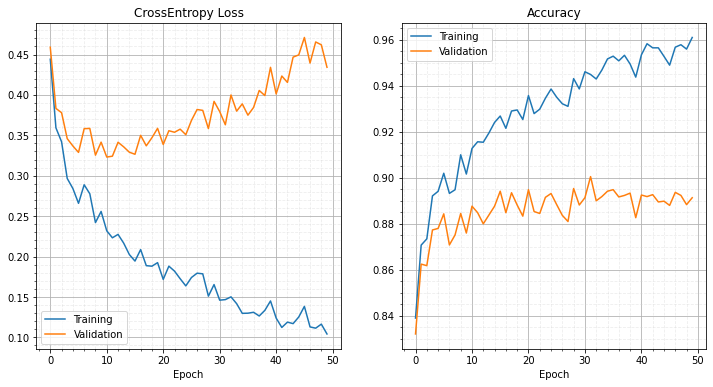

In [46]:
evaluateModel(num_hidden_layers=1, num_neurons=100, lr=0.01, num_epochs=50, batch_size=1000, optimizer="adam")

Hidden layers:  1
Learning rate:  0.01
Epochs:  30
Batch size:  500
Adam

Best validation accuracy = 89.517 %
Test set loss : 0.410
Test set accuracy ccuracy : 88.100 %



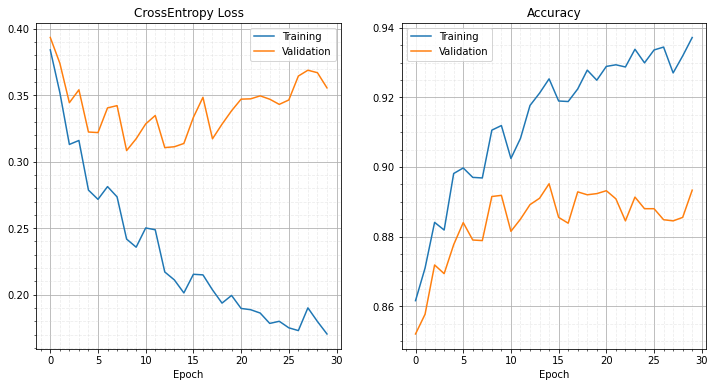

In [41]:
evaluateModel(num_hidden_layers=1, num_neurons=200, lr=0.01, num_epochs=30, batch_size=500, optimizer="adam")

Hidden layers:  1
Learning rate:  0.001
Epochs:  50
Batch size:  250
Adam

Best validation accuracy = 90.450 %
Test set loss : 0.386
Test set accuracy ccuracy : 89.320 %



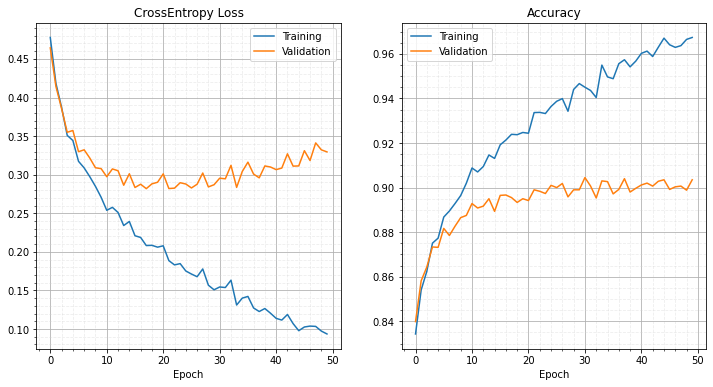

In [48]:
evaluateModel(num_hidden_layers=1, num_neurons=400, lr=0.001, num_epochs=50, batch_size=250, optimizer="adam")

Hidden layers:  1
Learning rate:  0.001
Epochs:  50
Batch size:  250
Adam

Best validation accuracy = 90.417 %
Test set loss : 0.393
Test set accuracy ccuracy : 88.820 %



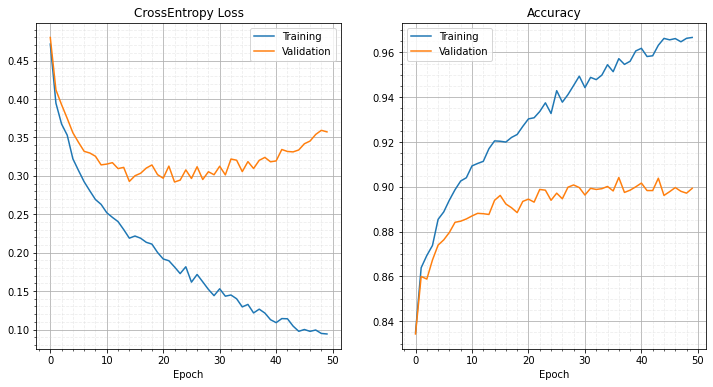

In [43]:
evaluateModel(num_hidden_layers=1, num_neurons=300, lr=0.001, num_epochs=50, batch_size=250, optimizer="adam")

Hidden layers:  2
Learning rate:  0.002
Epochs:  50
Batch size:  250
Adam

Best validation accuracy = 90.033 %
Test set loss : 0.471
Test set accuracy ccuracy : 89.130 %



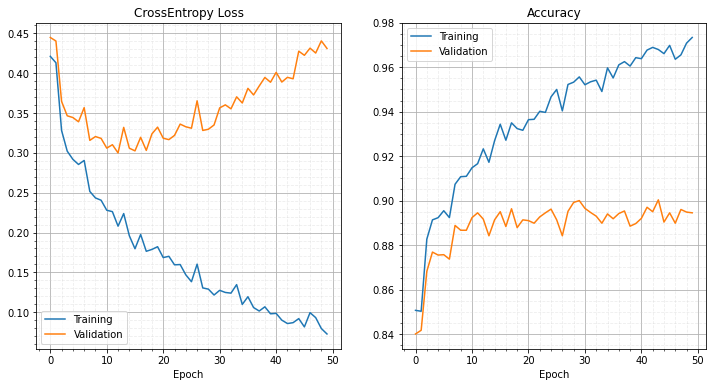

In [42]:
evaluateModel(num_hidden_layers=2, num_neurons=200, lr=0.002, num_epochs=50, batch_size=250, optimizer="adam")

Hidden layers:  2
Learning rate:  0.002
Epochs:  50
Batch size:  200
Adam

Best validation accuracy = 89.450 %
Test set loss : 0.482
Test set accuracy ccuracy : 89.120 %



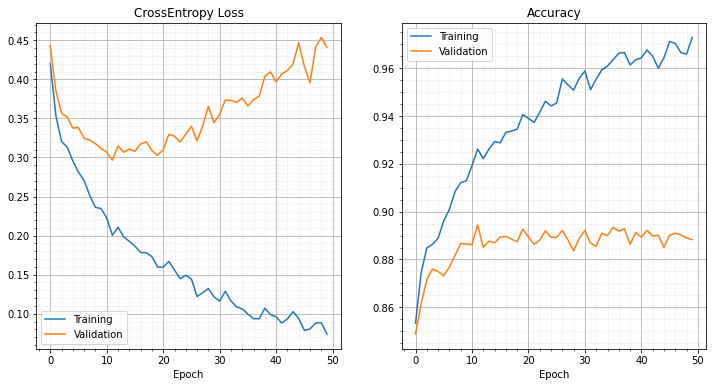

In [47]:
evaluateModel(num_hidden_layers=2, num_neurons=200, lr=0.002, num_epochs=50, batch_size=200, optimizer="adam")

Hidden layers:  2
Learning rate:  0.002
Epochs:  50
Batch size:  100
Adam

Best validation accuracy = 89.600 %
Test set loss : 0.562
Test set accuracy ccuracy : 88.520 %



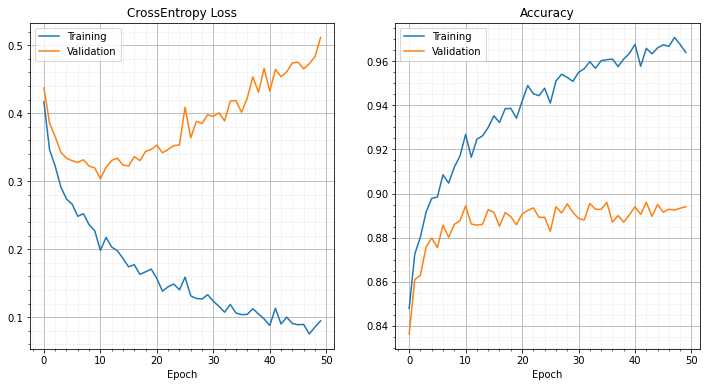

In [44]:
evaluateModel(num_hidden_layers=2, num_neurons=300, lr=0.002, num_epochs=50, batch_size=100, optimizer="adam")

## **Discussion :**

Équipe avec Gauthier Pezolli

a) Voir document

b) 
Plusieurs modèles ont été testés avec un nombre de couches cachées,  un nombre de neuronnes par couche, une taille de mini-batch et un taux d'apprentissage différents. On a testé 1 ou 2 couches cachées, un nombre de neuronnes entre 100 et 400, une taille de mini-batch entre 100 et 500 et un taux d'apprentissage entre 0.01 et 0.001. Tous les modèles utilisent adam.

La majorité des modèles dépassent les 88.0% de précision sur le test set. Le meilleur modèle, avec un nombre de couches de 1, un nombre de neuronnes de 400, une taille de mini-batch de 250 et un taux d'apprentissage de 0.001 a une précision de 89,320 %.

On remarque facilement que les modèles deviennent rapidement surentraîné puisque l'on utilise pas de techniques de régularisation. Néanmoins, la bien plus grande expressivité du modèle par rapport à la question #2 permet d'atteindre une précision bien plus élevée (84,600 % -> 89.32 %). 
